# Inżynieria lingwistyczna
Ten notebook jest oceniany półautomatycznie. Nie twórz ani nie usuwaj komórek - struktura notebooka musi zostać zachowana. Odpowiedź wypełnij tam gdzie jest na to wskazane miejsce - odpowiedzi w innych miejscach nie będą sprawdzane (nie są widoczne dla sprawdzającego w systemie).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE".

---

# Zadanie 1 - tokenizacja (12 pkt)

Jedną z nowoczesnych technik tokenizacji jest BPE - byte-pair encoding [1]. Technika ta polega na podzielenie słów na częste podsłowa (a'la morfemy?). W przeciwieństwie do podejść lingwistycznych, wymagających zwykle ręcznie napisanych reguł tworzenia morfemów czy nawet słowników lematów, BPE znajduje je heurystycznie poprzez wyznaczenie najczęstszych przylegających do siebie sekwencji znaków.

Algorytm przebiega w następujących krokach.
1. Podziel wszystkie słowa na symbole (początkowo pojedyncze znaki)
2. Wyznacz najczęściej występującą obok siebie parę symboli 
3. Stwórz nowy symbol będący konkatenacją dwóch najczęstszych symboli.

Uwaga 1: każde słowo zakończone jest specjalnym symbolem końca wyrazu.

Uwaga 2: tworzenie nowego symbolu nie powoduje usuniecie starego tj. zawsze jednym z możliwych symboli jest pojedynczy znak, ale jeśli można to stosujemy symbol dłuższy.

Przykład: korpus w którym występuje ,,ala'' 5 razy i ,,mama 10 razy''
1. Dzielimy słowa na symbole ,,a l a END'' ,,m a m a END''  gdzie END jest symbolem końca wyrazu.
2. Najczęstsza para obok siebie to ,,m a'' (20 razy)
3. Nowy symbol ,,ma''
4. Nowy podział ,,a l a END'' ,,ma ma END''
5. Najczęstsza para ,,ma ma'' (10 razy)
6. Nowy symbol ,,mama''
7. Nowy podział ,,a l a END'' ,,mama END''
8. itd.

W pliku ,,brown_clusters.tsv'' pierwsza kolumna to identyfikator skupienia (nie używamy w tym zadaniu), druga kolumna to wyrazy, a trzecia to ich liczności w pewnym korpusie tweetów. Zaimplementuj technikę BPE i przetesuj ją na tych słowach.

Parametrem algorytmu BPE jest `number_of_iterations` czyli liczba iteracji (łączeń symboli). Dodatkowo implementacja powinna mieć parametr `verbose`, którego wartość `True` powinna skutkować wypisywaniem na konsolę wykonywanych operacji (tj. łączeń).

[1] Sennrich, R., Haddow, B., and Birch, A. (2016). Neural machine translation of rare words with subword units. In ACL 2016.

In [2]:
import pandas as pd
import numpy as np
from collections import defaultdict
brown_df = pd.read_csv('brown_clusters.tsv', sep='\t', header=0, names=['cluster', 'word', 'count'])

number_of_iterations = 10
def preform_bpe(brown_df, number_of_iterations, verbose = False):
    brown_df['word'] = brown_df['word'].astype('str') 
    brown_df['word'] = brown_df['word'].apply(lambda x: list(x) + ['END'])
    brown_tuples = tuple(zip(brown_df['word'], brown_df['count']))
    for z in range(number_of_iterations):
        count_frequency = defaultdict(lambda: 0)
        for tokens, freq in brown_tuples:
            for j in range(1, len(tokens)):
                count_frequency[tokens[j - 1] + tokens[j]] += freq
        count_frequency = sorted(count_frequency.items(), key=lambda x: x[1], reverse=True)
        most_frequent_token = count_frequency[0][0]
        new_brown_tuples = []
        for tokens, freq in brown_tuples:
            new_tokens = []
            i = 1         
            while i < len(tokens):
                if tokens[i - 1] + tokens[i] == most_frequent_token:
                    new_tokens.append(most_frequent_token)
                    i += 1
                else:
                    new_tokens.append(tokens[i - 1])
                i += 1
            if len(tokens) > 1 and tokens[-2] + tokens[-1] != most_frequent_token:
                new_tokens.append(tokens[-1])

            new_brown_tuples.append((new_tokens, freq))
        brown_tuples = new_brown_tuples
        if verbose:
            pass
            # print(f'ITER {z+1}:')
            # print(most_frequent_token)
    tokens = [' '.join(t) for t, _ in brown_tuples]

    return tokens
    """
    Funckcja przyjmuje ramkę w formacie analogicznym do obiektu brown_df (wczytany wyżej)
     oraz liczbę iteracji.
    Wyjściem funkcji powinna być lista słów z poszczególnymi tokenami/symbolami oddzielonymi spacją.
    Za znak końca wyrazu przyjmij END. 
    """



Test implementacji:

In [78]:
from nose.tools import assert_list_equal
data = {'cluster': range(2), 'word':['ala', 'mama'], 'count': [5,10]}
df = pd.DataFrame (data, columns = ['cluster', 'word', 'count'])
vocab = preform_bpe(df, 1)
assert_list_equal(vocab, ['a l a END', 'ma ma END'])

Spraw aby Twoja implementacja wypisywała kolejne łączone ze sobą symbole (parametr `verbose`) i uruchom Twoją funkcję na np. 50 iteracji, obserwując jakie tokeny są tworzone.

In [79]:
preform_bpe(brown_df, 50, verbose=True)

ITER 1:
eEND
ITER 2:
tEND
ITER 3:
sEND
ITER 4:
in
ITER 5:
th
ITER 6:
dEND
ITER 7:
yEND
ITER 8:
.END
ITER 9:
oEND
ITER 10:
rEND
ITER 11:
an
ITER 12:
>END
ITER 13:
on
ITER 14:
ou
ITER 15:
gEND
ITER 16:
aEND
ITER 17:
lEND
ITER 18:
ingEND
ITER 19:
<@
ITER 20:
<@M
ITER 21:
<@ME
ITER 22:
<@MEN
ITER 23:
<@MENT
ITER 24:
<@MENTI
ITER 25:
<@MENTIO
ITER 26:
<@MENTION
ITER 27:
<@MENTION>END
ITER 28:
re
ITER 29:
iEND
ITER 30:
theEND
ITER 31:
en
ITER 32:
om
ITER 33:
toEND
ITER 34:
,END
ITER 35:
!END
ITER 36:
er
ITER 37:
ha
ITER 38:
erEND
ITER 39:
it
ITER 40:
:END
ITER 41:
you
ITER 42:
ar
ITER 43:
al
ITER 44:
or
ITER 45:
ow
ITER 46:
..END
ITER 47:
st
ITER 48:
kEND
ITER 49:
isEND
ITER 50:
fEND


['\\ iEND',
 '/ i / END',
 't o d a y - iEND',
 'n ow iEND',
 '# you e v erEND',
 'i f in al l yEND',
 '「 iEND',
 '- i - END',
 'in e v aEND',
 '» iEND',
 'w ha t t a y aEND',
 'i i i i i i i i i iEND',
 '\ue6d1 END',
 'i k in d aEND',
 'l o l - iEND',
 'i a c t u al l yEND',
 'w a d d y aEND',
 '# a s l on g a s you END',
 'd o you END',
 '\u200e \u200b iEND',
 'i ̇ END',
 'ï END',
 '# l o l a t g i r l s w h oEND',
 '# r t i f you END',
 'i j s tEND',
 '« iEND',
 '• iEND',
 'w h o d aEND',
 'w ha d y aEND',
 ') iEND',
 '+ iEND',
 '# you r f a c e m a k e s m eEND',
 'i i i i i i i iEND',
 '` iEND',
 'i i i i i i iEND',
 'i al re a d yEND',
 '_ iEND',
 '# you m a k e m eEND',
 '* iEND',
 '| iEND',
 '# u r b o y f r i en d e v erEND',
 'w h en iEND',
 'ι END',
 "d on ' t c h aEND",
 "w h o ' d aEND",
 'd you END',
 'w ha d d a y aEND',
 'i on l yEND',
 'i j u s sEND',
 'i al w a y sEND',
 'i i i i iEND',
 'd on c h aEND',
 '( iEND',
 "d ' y aEND",
 'ı END',
 '# u e v erEND',
 'in e v e

- Jakie angielskie słowo jako pierwsze dostało swój własny token?

in

- Jakie są zalety korzystania z tokenizacji BPE w kontekście tworzenia reprezentacji do problemu klasyfikacji tekstu (problem OOV, odnieś się do k-gramów i n-gramów)? Jakie są zalety BPE w przypadku przetwarzania różny rodzajów języków (np. fleksyjne, aglutynacyjne)?

Tokenizacja BPE dzięki funkcjonowaniu na poziomie znaków jest w stanie uwzględnić różne rodzaje słów, poprzez podzielenie słów na podsłowa, które mogłyby być OOV w innych podejściach tokenizacji. Eliminuje również potrzebę definiowania stałej długości n-gramów, co jest korzystne w przypadku języków o róznych długościach i pozwala uniknąć problemów związanych z dużymi n-gramami (duża liczba parametrów) i brakującymi k-gramami w tradycyjnym podejściu. Dzięki elastyczności w zakresie tworzenia słów, w językach fleksyjnych, gdzie pojedyncze słowo może przyjmować wiele różnych form pod wpływem odmian w zależności od przypadku, czasu, osoby itp., BPE jest w stanie tworzyć reprezentacje słów poprzez podzielenie ich na mniejsze części. W przypadku języków aglutynacyjnych, gdzie dodawane są różne przyrostki do podstawowych słów, tokenizacja BPE jest w stanie wydzielić z długich i złożonych słów podstawowe części, co ułatwia analizę i przetwarzanie tekstu. Ponadto BPE jest w stanie bez problemu dostosować się do różnych języków bez konieczności jakiejkolwiek konfiguracji jak np. ustalenie liczby n w przypadku analizy n-gramów.

Wróć do implementacji i zakomentuj wypisywanie (funkcje print) informacji z funkcji `preform_bpe`.

# Zadanie 2 - klasyfikacja (15 pkt)

Poniższy kod powinien wczytać i ztokenizować zbiór danych dot. analizy wydźwięku. Jeśli nie masz biblioteki `nltk` musisz ją zainstalować.

In [3]:
from helpers import DataSet
training_set = DataSet(['tweets.txt'])

Reading data set ['tweets.txt']


Poniżej znajdziesz przykład odczytu jednego tweeta z obiektu DataSet

In [2]:
for i in training_set.tweets:
    print(i.text)
    print(i.tokens)
    print(i.clazz)
    break

dear @Microsoft the newOoffice for Mac is great and all, but no Lync update? C'mon.
['dear', '@microsoft', 'the', 'newooffice', 'for', 'mac', 'is', 'great', 'and', 'all', ',', 'but', 'no', 'lync', 'update', '?', "c'mon", '.']
negative


Systemy IL często pracują z bardzo dużą liczbą cech, które są rzadkie np. cechy Bag-Of-Words, cechy n-gramowe itd. Powoduje to że klasyczna macierz zawierająca przykłady uczące ($n$) i cechy ($d$) rośnie do bardzo dużych rozmiarów ($nd$) nawet dla małych zbiorów uczących (w sensie liczby przykładów). Ponadto samo przechowywanie w pamięci słownika mapującego konkretne słowa/n-gramy na indeksy kolumn macierzy może być bardzo kosztowne pamięciowo przy dużych rozmiarach słownika.

Istnieje jednak technika, która pozwala nam na ominięcie tej przeszkody: haszowanie cech. Opis tej techniki znajdziesz na stronie:  https://en.wikipedia.org/wiki/Feature_hashing Jest ona też implementowana w obiekcie `sklearn.feature_extraction.FeatureHasher`. Zapoznaj się z opisem techniki i wykonaj poniższe polecenia.

- Wykorzystując haszowanie cech wytrenuj wybrany klasyfikator (najlepiej taki, który się szybko liczy) na zbiorze uczącym dla cech Bag-of-words (możesz też spróbować cechy n-gramowe). Możesz wykorzystać gotową tokenizację we właściwości `.tokens`.

In [20]:
from sklearn.feature_extraction import FeatureHasher
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

model = LogisticRegression(random_state=0, max_iter=1000)
h = FeatureHasher(n_features=1024, input_type='string')
X = [t.tokens for t in training_set.tweets]
y = [t.clazz for t in training_set.tweets]

X_train, X_test, y_train, y_test = train_test_split(h.transform(X), y, test_size=0.2, random_state=123)
model.fit(X_train, y_train)
print(model.score(X_test, y_test))

0.5512820512820513


- Stwórz wykres zależności wybranej miary klasyfikacji od wymiarów macierzy danych (chodzi o liczbę cech do których haszujemy cechy oryginalne). Wystarczy przetestować kilka (>=4) wybranych wartości na skali logarytmicznej.

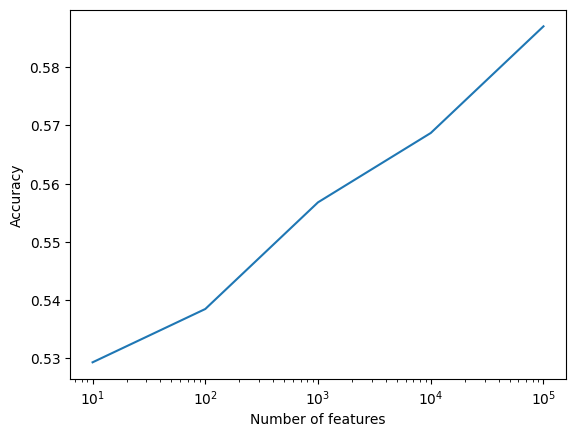

In [17]:
import matplotlib.pyplot as plt
n_features = [10**i for i in range(1, 6)]
scores = []

def predict_tweets(n_features, X, y):
    h = FeatureHasher(n_features=n_features, input_type='string')
    model = LogisticRegression(random_state=0, max_iter=300)
    X_train, X_test, y_train, y_test = train_test_split(h.transform(X), y, test_size=0.2, random_state=123)
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

for n in n_features:
    scores.append(predict_tweets(n, X, y))

plt.plot(n_features, scores)
plt.xscale('log')
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.show()

 - Obserwując stworzony wykres - skomentuj. Jak dużo jakości klasyfikacji się traci (albo zyskuje?) korzystając z mniejszej liczby haszowanych cech? Często klasyfikatory bardzo dobrze działają nawet przy liczbie haszowanych cech dla których na pewno istnieją konflikty cech oryginalnych - jak myślisz dlaczego? (Pomyśl o interpretacji takich skonfliktowanych cech).

Dla regresji logistycznej jakość klasyfikacji rośnie w przybliżeniu liniowo od ok. 0.53 dla 10 cech do ok 0.59 dla 10^5 cech. Korzystając więc z mniejszej liczby haszowanych cech można więc uzyskać stratę >5% na trafności klasyfikacji. 

Dla mniejszej liczby haszowanych cech, dla których istnieją konflikty cech oryginalnych, działają bardzo dobrze ze względu na użycie drugiej funkcji haszującej, która zwraca znak wartości dodanej do danego elementu wektora (1 lub -1). Oznacza to, że skonfliktowane cechy się redukują i kolizja nie występuje. To działanie może również wynikać z wysokiej korelacji występującej pomiędzy cechami skonfliktowanymi.

 - W poprzednim zadaniu wczytałeś wynik grupowania Browna do pamięci. Wytrenuj klasyfikator na reprezentacji ,,Bag-of-clusters'' tj. w kolumnach zamiast słów/n-gramów będziesz miał grupy.

In [28]:
clusters = brown_df['cluster'].unique()
quantified_clusters = np.eye(len(clusters))
clusters_dict = {c: quantified_clusters[i] for i, c in enumerate(clusters)}
words_to_clusters_mapping = {w: clusters_dict[c] for w, c in zip(brown_df['word'], brown_df['cluster'])}
X = np.array([np.sum([words_to_clusters_mapping[token] for token in tweet.tokens if token in words_to_clusters_mapping], axis=0) for tweet in training_set.tweets])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

print('n_features: ', len(clusters))
model = LogisticRegression(random_state=0, max_iter=300)
model.fit(X_train, y_train)
model.score(X_test, y_test)

n_features:  937


0.5842490842490843

- Podsumuj eksperymenty: poznałeś dwie możliwości ograniczenia liczby cech - zastąpienie słów ich grupami i haszowanie cech. Jakie są wady i zalety obydwu podejść?

Dla reprezentacji bag-of-clusters uzyskałem nieznacznie lepszą trafność klasyfikacji dla podobnej liczby cech (~10^3) w porównaniu z reprezentacją bag-of-words. Wynikać to może z problemu kolizji przy technice feature hashing i lepszego uogólnienia semantycznego znaczenia podobnych wyrazów.

**Bag-of-Clusters**

Zalety:
 * możliwość grupowania podobnych znaczeniowo wyrazów -> lepsze uogólnienie wiedzy
 * możliwość łatwej interpretacji predykcji modelu

Wady:
 * konieczność grupowania słów w korpusie -> dodatkowa kosztowna operacja
 * wynik predykcji uzależniony od wcześniejszego grupowania

**Feature hashing**

Zalety:
 * szybki i wydajny pamięciowo sposób reprezentacji korpusu treningowego
 * możliwość redukcji występujących kolizji poprzez zastosowanie dodatkowej funkcji
 
Wady:
 * możliwość kolizji obniżających jakość predykcji
 * brak występowania jakiejkolwiek relacji pomiędzy reprezentacjami poszczególnych wyrazów